## Stroke Prediction

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("healthcare-dataset-stroke-data.csv")

In [3]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
df.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [5]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [6]:
num=df.select_dtypes(include=['int','float']).columns

In [7]:
cat=df.select_dtypes(include=['object']).columns

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [9]:
df.describe(include="all")

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110.000000,5110,5110.000000,5110.000000,5110.000000,5110,5110,5110,5110.000000,4909.000000,5110,5110.000000
unique,NaN,3,NaN,NaN,NaN,2,5,2,NaN,NaN,4,NaN
top,NaN,Female,NaN,NaN,NaN,Yes,Private,Urban,NaN,NaN,never smoked,NaN
freq,NaN,2994,NaN,NaN,NaN,3353,2925,2596,NaN,NaN,1892,NaN
mean,36517.829354,NaN,43.226614,0.097456,0.054012,NaN,NaN,NaN,106.147677,28.893237,NaN,0.048728
std,21161.721625,NaN,22.612647,0.296607,0.226063,NaN,NaN,NaN,45.283560,7.854067,NaN,0.215320
min,67.000000,NaN,0.080000,0.000000,0.000000,NaN,NaN,NaN,55.120000,10.300000,NaN,0.000000
25%,17741.250000,NaN,25.000000,0.000000,0.000000,NaN,NaN,NaN,77.245000,23.500000,NaN,0.000000
50%,36932.000000,NaN,45.000000,0.000000,0.000000,NaN,NaN,NaN,91.885000,28.100000,NaN,0.000000
75%,54682.000000,NaN,61.000000,0.000000,0.000000,NaN,NaN,NaN,114.090000,33.100000,NaN,0.000000


In [10]:
df[cat].describe()

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


In [11]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

### impute bmi column with mean

In [12]:
df['bmi'].fillna(df['bmi'].mean(),inplace=True)

In [13]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

### remove id column

In [14]:
df.drop(columns=["id"],inplace=True)

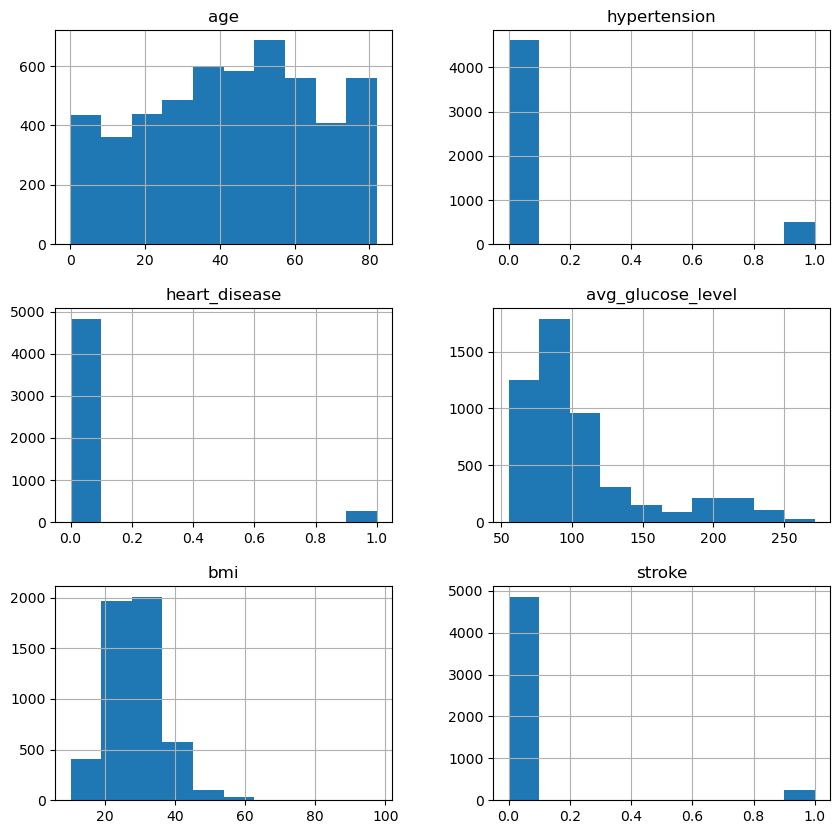

In [15]:
num=df.select_dtypes(include=['int','float']).columns
df[num].hist(bins=10,figsize=(10,10))
plt.show()

<Axes: >

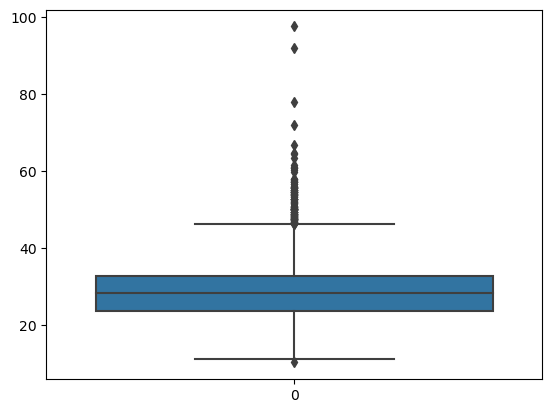

In [16]:
sns.boxplot(df['bmi'])

<Axes: >

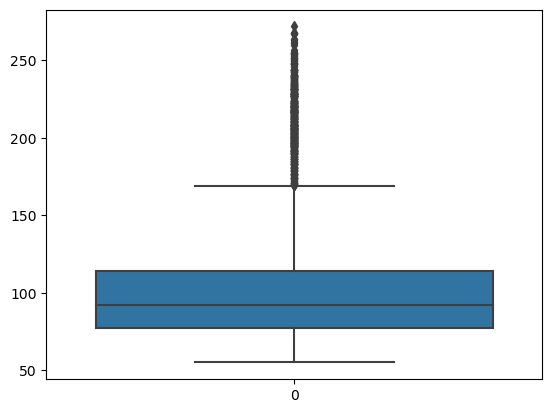

In [17]:
sns.boxplot(df["avg_glucose_level"])

In [18]:
q1=df["bmi"].quantile(0.25)
q3=df["bmi"].quantile(0.75)
iqr=q3-q1

In [19]:
lw=q1-1.5*iqr
uw=q3+1.5*iqr

In [20]:
df['bmi']=np.where(df['bmi']<lw,lw,df["bmi"])
df["bmi"]=np.where(df['bmi']>uw,uw,df["bmi"])

<Axes: >

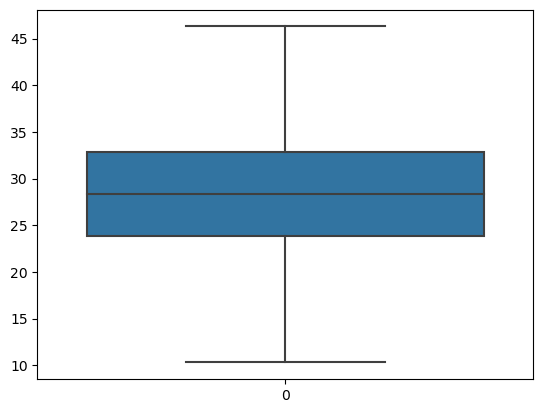

In [21]:
sns.boxplot(df["bmi"])

In [22]:
q1=df["avg_glucose_level"].quantile(0.25)
q3=df["avg_glucose_level"].quantile(0.75)
iqr=q3-q1

In [23]:
iw=q1-1.5*iqr
uw=q3+1.5*iqr

In [24]:
df["avg_glucose_level"]=np.where(df["avg_glucose_level"]<lw,lw,df["avg_glucose_level"])
df["avg_glucose_level"]=np.where(df["avg_glucose_level"]>uw,uw,df["avg_glucose_level"])

<Axes: >

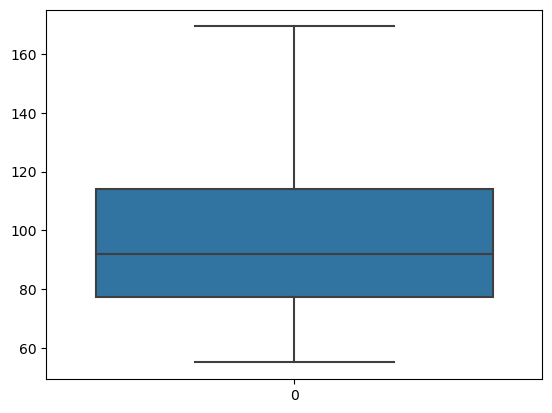

In [25]:
sns.boxplot(df["avg_glucose_level"])

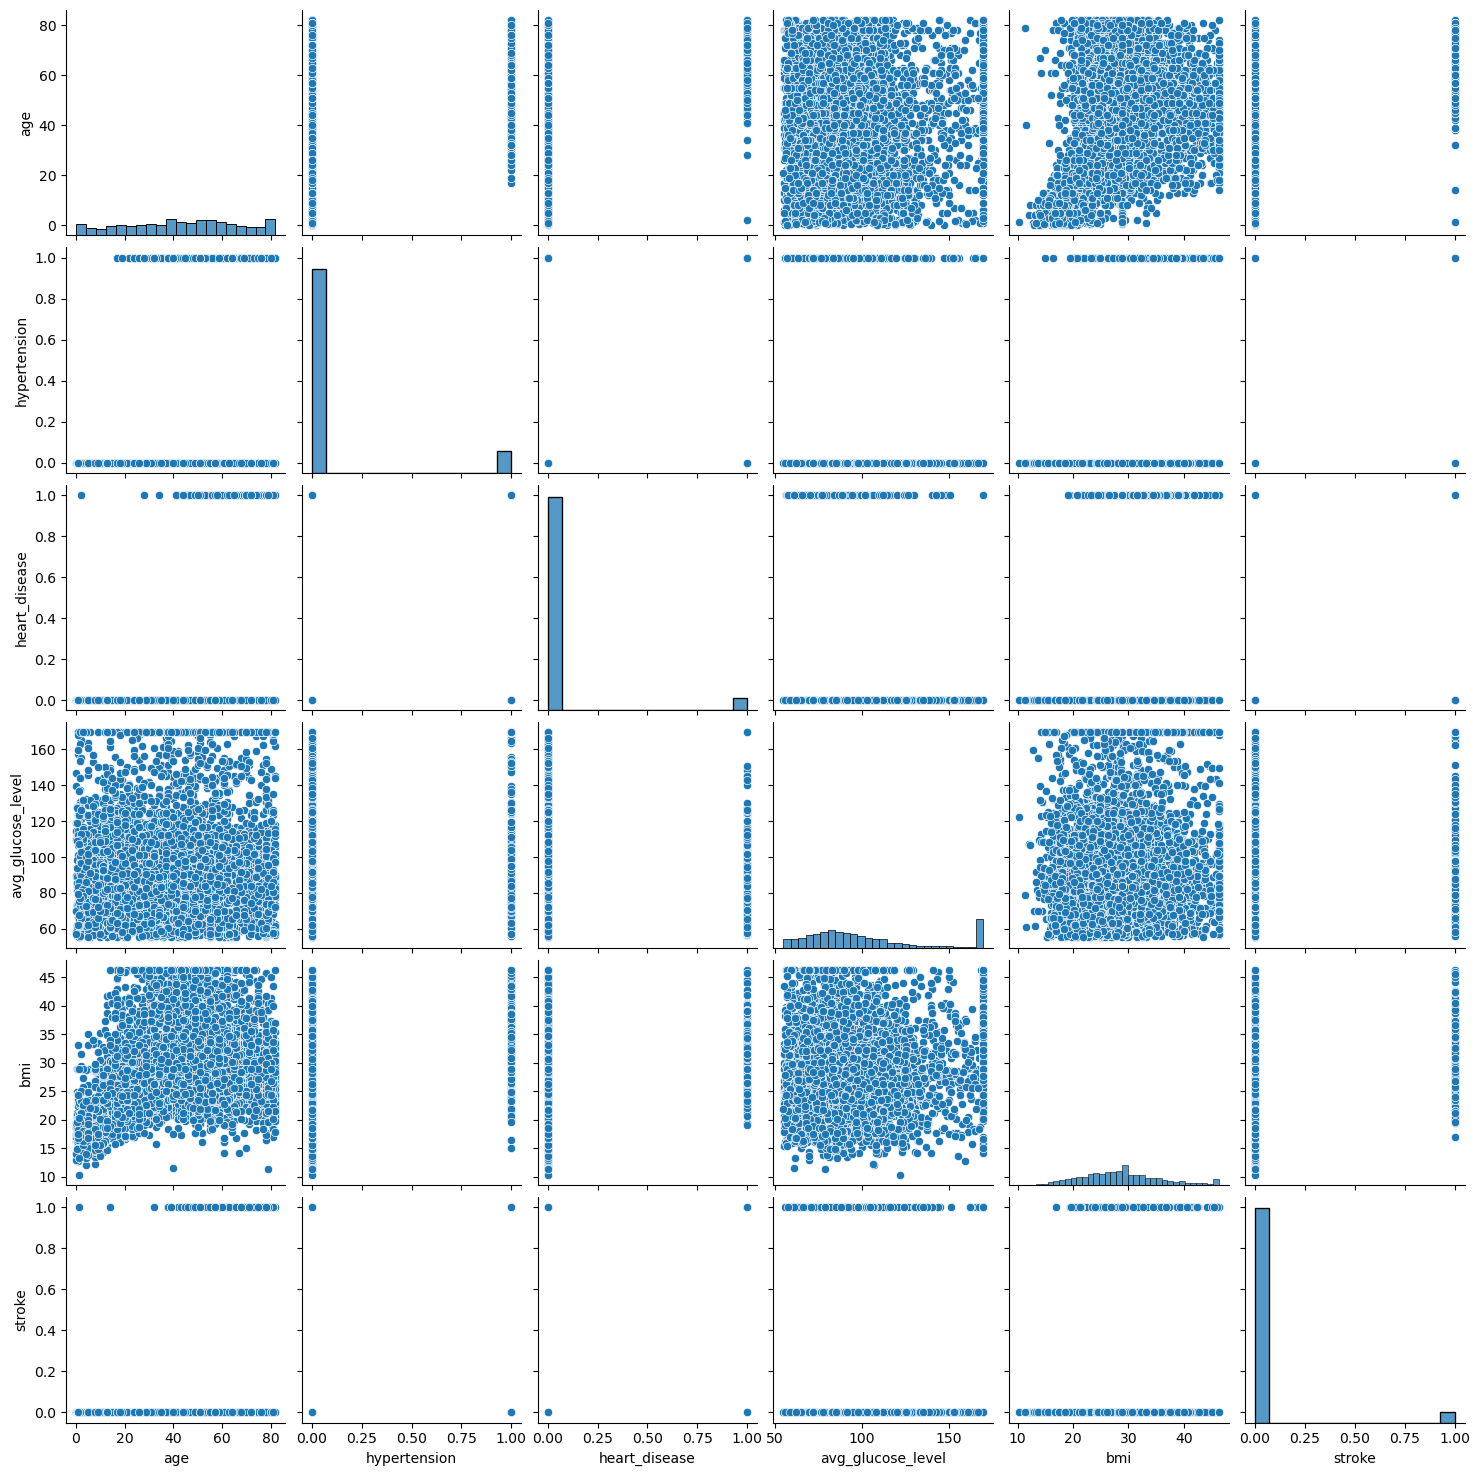

In [26]:
sns.pairplot(df)

In [27]:
cor_mat=df[num].corr()

<Axes: >

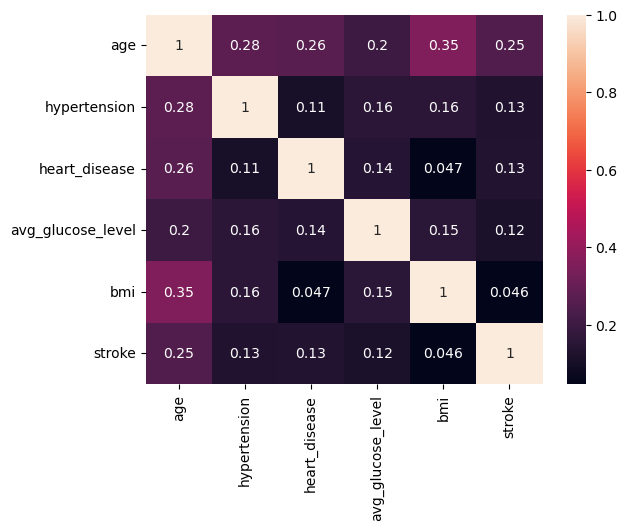

In [28]:
sns.heatmap(cor_mat,annot=True)

Text(0.5, 1.0, 'stroke by Age')

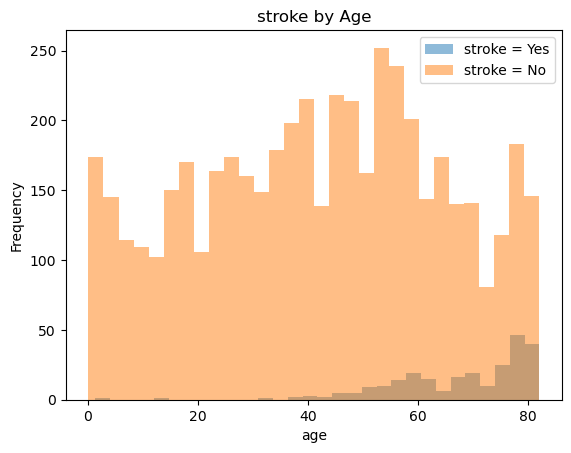

In [29]:
df[df['stroke']==1]['age'].plot.hist(bins=30, alpha=0.5, label='stroke = Yes')
df[df['stroke']==0]['age'].plot.hist(bins=30, alpha=0.5, label='stroke = No')

plt.legend()
plt.xlabel('age')
plt.title('stroke by Age')

<Axes: xlabel='stroke', ylabel='count'>

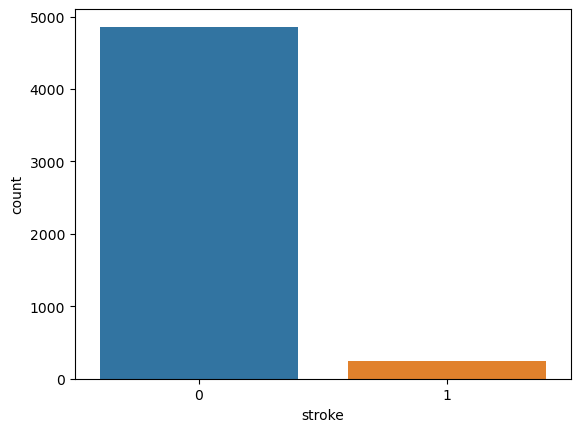

In [30]:
sns.countplot(data=df,x="stroke")

<Axes: xlabel='gender', ylabel='count'>

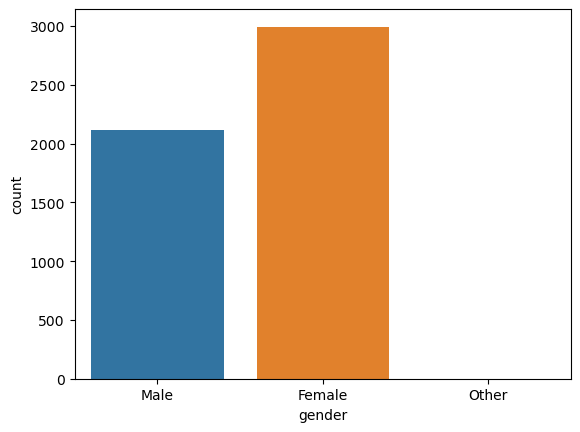

In [31]:
sns.countplot(data=df,x="gender")

<Axes: xlabel='ever_married', ylabel='count'>

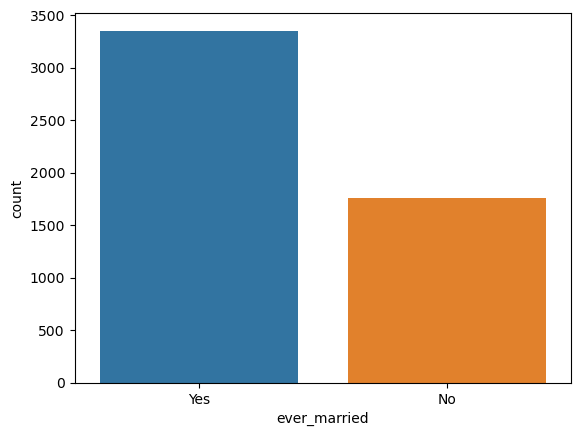

In [32]:
sns.countplot(data=df,x="ever_married")

<Axes: xlabel='work_type', ylabel='count'>

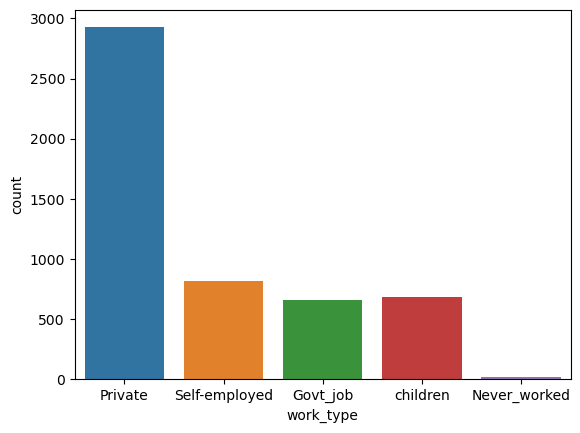

In [33]:
sns.countplot(data=df,x="work_type")

<Axes: xlabel='Residence_type', ylabel='count'>

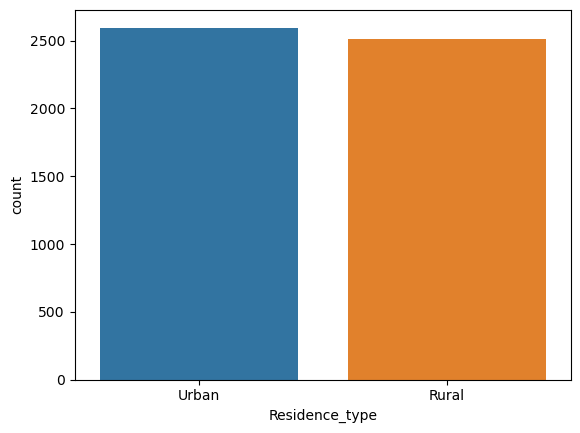

In [34]:
sns.countplot(data=df,x='Residence_type')

<Axes: xlabel='smoking_status', ylabel='count'>

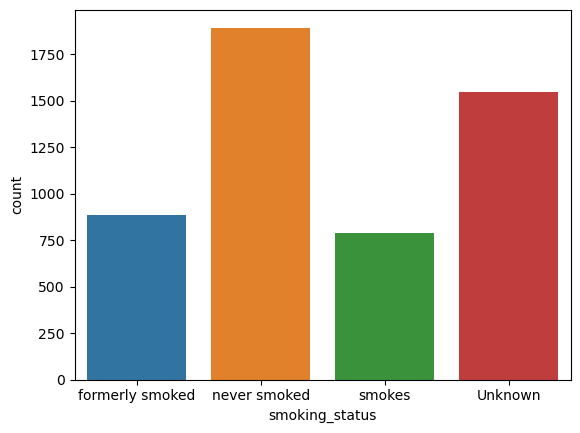

In [35]:
sns.countplot(data=df,x='smoking_status')

### encoding


####  Labell Encoding 

In [36]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['ever_married'] = le.fit_transform(df['ever_married'])
df['Residence_type'] = le.fit_transform(df['Residence_type'])


#### One-Hot Encoding

In [37]:
df=pd.get_dummies(df,columns=['gender','work_type','smoking_status'],drop_first=True)

In [38]:
df

,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,1,1,169.3575,36.600000,1,1,0,0,1,0,0,1,0,0
1,61.0,0,0,1,0,169.3575,28.893237,1,0,0,0,0,1,0,0,1,0
2,80.0,0,1,1,0,105.9200,32.500000,1,1,0,0,1,0,0,0,1,0
3,49.0,0,0,1,1,169.3575,34.400000,1,0,0,0,1,0,0,0,0,1
4,79.0,1,0,1,0,169.3575,24.000000,1,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,80.0,1,0,1,1,83.7500,28.893237,0,0,0,0,1,0,0,0,1,0
5106,81.0,0,0,1,1,125.2000,40.000000,0,0,0,0,0,1,0,0,1,0
5107,35.0,0,0,1,0,82.9900,30.600000,0,0,0,0,0,1,0,0,1,0
5108,51.0,0,0,1,0,166.2900,25.600000,0,1,0,0,1,0,0,1,0,0


In [39]:
X=df.drop("stroke",axis=1)
y=df["stroke"]


#### Scaling

In [40]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled = scaler.fit_transform(X)
scaled_df=pd.DataFrame(scaled,columns=X.columns)
X=scaled_df

#### Train test spllit

In [41]:
from sklearn.model_selection import train_test_split


X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

#### Handling Imbalanced Data

In [42]:
from imblearn.over_sampling import SMOTE

sm=SMOTE(random_state=42)
X_res,y_res=sm.fit_resample(X_train,y_train)

In [43]:
print("Before SMOTE:",y_train.value_counts().to_dict())
print("After SMOTE:",y_res.value_counts().to_dict())

Before SMOTE: {0: 3901, 1: 187}
After SMOTE: {0: 3901, 1: 3901}


#### Model Selection

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

model_lr=LogisticRegression()
model_lr.fit(X_res,y_res)
y_pred=model_lr.predict(X_test)

acc=accuracy_score(y_test,y_pred)
pre=precision_score(y_test,y_pred)
rec=recall_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)

print("acc: ", acc,"\n" "pre:" , pre, "\n" "rec: ",rec,"\n" "f1: " ,f1)


acc:  0.7553816046966731 
pre: 0.17586206896551723 
rec:  0.8225806451612904 
f1:  0.28977272727272724


In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

model_rf=RandomForestClassifier()
model_rf.fit(X_res,y_res)
y_pred=model_rf.predict(X_test)

acc=accuracy_score(y_test,y_pred)
pre=precision_score(y_test,y_pred)
rec=recall_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)

print("acc: ", acc,"\n" "pre:" , pre, "\n" "rec: ",rec,"\n" "f1: " ,f1)

acc:  0.9158512720156555 
pre: 0.18421052631578946 
rec:  0.11290322580645161 
f1:  0.14


In [46]:
from xgboost import XGBClassifier  
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

model_xg=XGBClassifier()
model_xg.fit(X_res, y_res)
y_pred=model_xg.predict(X_test)

acc=accuracy_score(y_test,y_pred)
pre=precision_score(y_test,y_pred)
rec=recall_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)

print("acc: ", acc,"\n" "pre:" , pre, "\n" "rec: ",rec,"\n" "f1: " ,f1)


acc:  0.910958904109589 
pre: 0.08571428571428572 
rec:  0.04838709677419355 
f1:  0.061855670103092786
